In [11]:
# =================================================================
# PROJECT: ANALISIS DATA COVID-19 INDONESIA (DQLAB CASE STUDY)
# Author: [Amin sabari]
# Deskripsi: Mengambil data real-time dari API publik covid19.go.id
# =================================================================

import requests
import pandas as pd

# 1. PENGAMBILAN DATA (Data Acquisition)
# Menggunakan library requests untuk mengakses API pemerintah
print("Sedang mengambil data dari API...")
url = "https://storage.googleapis.com/dqlab-dataset/update.json"
resp = requests.get(url, verify=False)

# 2. VALIDASI KONEKSI
if resp.status_code == 200:
    print("✅ Koneksi Berhasil (Status Code 200)")

    # Mengubah format JSON menjadi dictionary Python
    covid_data = resp.json()

    # 3. EKSTRAKSI INFORMASI UTAMA
    # Mengambil ringkasan data terbaru
    penambahan = covid_data['update']['penambahan']
    total = covid_data['update']['total']

    print("-" * 40)
    print(f"Update Terakhir : {penambahan['tanggal']}")
    print(f"Kasus Baru      : {penambahan['jumlah_positif']}")
    print(f"Total Kasus     : {total['jumlah_positif']}")
    print("-" * 40)

    # 4. PENYIAPAN DATA UNTUK ANALISIS (Dataframe)
    # Mengambil data historis harian
    harian = covid_data['update']['harian']
    df_covid = pd.DataFrame(harian)

    print("\nPreview 5 Data Teratas:")
    print(df_covid.head())

else:
    print(f"❌ Gagal mengambil data. Status code: {resp.status_code}")


Sedang mengambil data dari API...


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


✅ Koneksi Berhasil (Status Code 200)
----------------------------------------
Update Terakhir : 2022-05-14
Kasus Baru      : 308
Total Kasus     : 6050519
----------------------------------------

Preview 5 Data Teratas:
              key_as_string            key  doc_count jumlah_meninggal  \
0  2020-03-02T00:00:00.000Z  1583107200000          1     {'value': 0}   
1  2020-03-03T00:00:00.000Z  1583193600000          1     {'value': 0}   
2  2020-03-04T00:00:00.000Z  1583280000000          1     {'value': 0}   
3  2020-03-05T00:00:00.000Z  1583366400000          1     {'value': 0}   
4  2020-03-06T00:00:00.000Z  1583452800000          1     {'value': 0}   

  jumlah_sembuh jumlah_positif jumlah_dirawat jumlah_positif_kum  \
0  {'value': 0}   {'value': 2}   {'value': 2}       {'value': 2}   
1  {'value': 0}   {'value': 0}   {'value': 0}       {'value': 2}   
2  {'value': 0}   {'value': 0}   {'value': 0}       {'value': 2}   
3  {'value': 0}   {'value': 0}   {'value': 0}       {'value': 

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


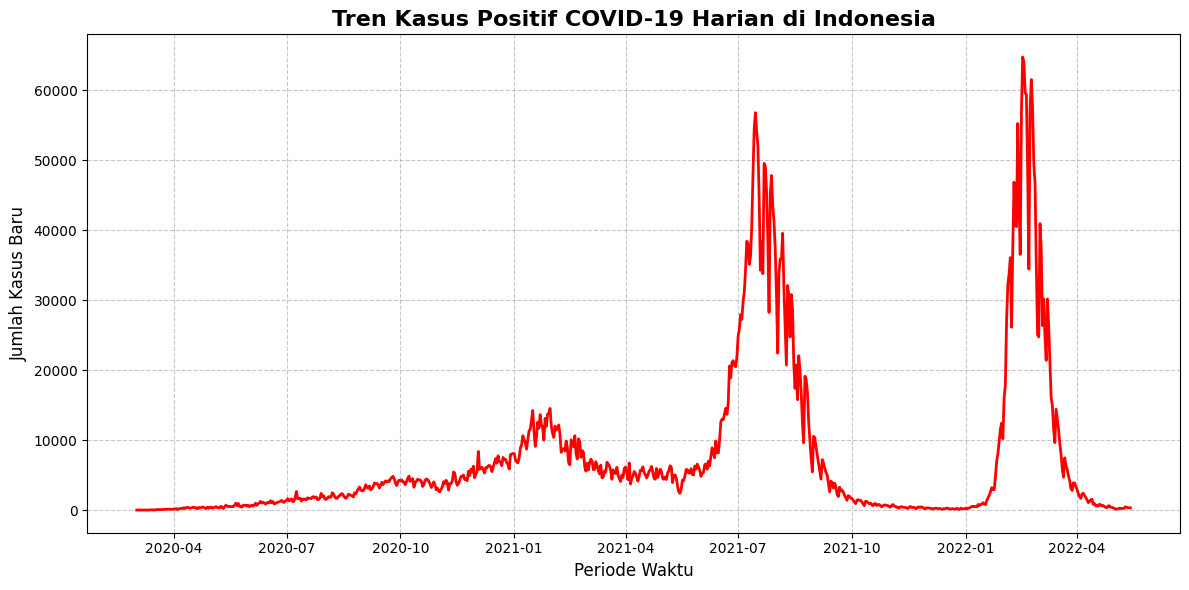

------------------------------
Update Terakhir: 2022-05-14
Total Baris Data: 804
------------------------------


In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 1. MENGAMBIL DATA
url = "https://storage.googleapis.com/dqlab-dataset/update.json"
resp = requests.get(url, verify=False)
covid_data = resp.json()

# 2. PROSES DATA (WRANGLING)
# Mengubah data harian menjadi DataFrame
df_covid = pd.DataFrame(covid_data['update']['harian'])

# Memperbaiki format tanggal
df_covid['tanggal'] = pd.to_datetime(df_covid['key_as_string']).dt.date

# Mengambil nilai angka dari kolom yang bersarang (nested)
df_covid['positif_harian'] = df_covid['jumlah_positif'].apply(lambda x: x['value'])

# 3. VISUALISASI GRAFIK
plt.figure(figsize=(12, 6))
plt.plot(df_covid['tanggal'], df_covid['positif_harian'], color='red', linewidth=2)

# Menambah keterangan grafik
plt.title('Tren Kasus Positif COVID-19 Harian di Indonesia', fontsize=16, fontweight='bold')
plt.xlabel('Periode Waktu', fontsize=12)
plt.ylabel('Jumlah Kasus Baru', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan Grafik
plt.show()

# 4. RINGKASAN DATA
print("-" * 30)
print(f"Update Terakhir: {df_covid['tanggal'].iloc[-1]}")
print(f"Total Baris Data: {len(df_covid)}")
print("-" * 30)